Spotify 'StreamingHistory0' data from May 9th, 2022 - October 14th, 2022

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as date

Import Excel data

In [105]:
df = pd.read_excel(r'C:\Users\duprase\Downloads\Spotify\StreamingHistory1.json.xlsx')
df

#df = pd.read_excel("StreamingHistory1.json.xlsx")
#df

,endTime,date,Wkday,time,artistName,trackName,msPlayed,minPlayed,Include Song
0,2022-05-09 19:38,2022-05-09,Mon\n,19:38,Punnany Massif,Élvezd,7381,0.123017,No\n
1,2022-08-17 13:01,2022-08-17,Wed,13:01,DJ Khaled,STAYING ALIVE (feat. Drake & Lil Baby),178176,2.969600,Yes\n
2,2022-08-17 13:05,2022-08-17,Wed,13:05,NAV,Never Sleep (with Lil Baby feat. Travis Scott),185785,3.096417,Yes\n
3,2022-08-17 13:06,2022-08-17,Wed,13:06,Nardo Wick,Dah Dah DahDah,20224,0.337067,No\n
4,2022-08-17 13:06,2022-08-17,Wed,13:06,DaBaby,WAITRESS,56876,0.947933,No\n
...,...,...,...,...,...,...,...,...,...
347,2022-10-14 23:45,2022-10-14,Fri,23:45,Pharrell Williams,Just a Cloud Away,176078,2.934633,Yes\n
348,2022-10-14 23:48,2022-10-14,Fri,23:48,Camila Cabello,Don't Go Yet,164842,2.747367,Yes\n
349,2022-10-14 23:51,2022-10-14,Fri,23:51,Sigala,Lullaby,204022,3.400367,Yes\n
350,2022-10-14 23:55,2022-10-14,Fri,23:55,BTS,Dynamite,199053,3.317550,Yes\n


In [106]:
df.shape

(352, 9)

In [107]:
list(df['Include Song'])

['No\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'No\n',
 'No\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'Yes\n',
 'No\n',
 'No\n',
 'Yes\n',
 'No\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'No\n',
 'Yes\n',
 'No\n',
 

In [108]:
def load_data(file):
    return pd.read_excel(file, may = ",", index_col = False, header=0)

In [109]:
#df = pd.read_excel("StreamingHistory1.json.xlsx")
#df

In [110]:
#df['Include Song'].str.split('\\n')
#tems['trackUri'] = items['trackUri'].apply(lambda uri: uri.split(':')[-1]) need to correct mine

In [111]:
df['Include Song'] = df['Include Song'].apply(lambda include: include.split('\n')[0]) 

In [112]:
skippedsongs = df[ df['Include Song'] == "No"].index
df.drop(skippedsongs, inplace = True)

In [113]:
df

,endTime,date,Wkday,time,artistName,trackName,msPlayed,minPlayed,Include Song
1,2022-08-17 13:01,2022-08-17,Wed,13:01,DJ Khaled,STAYING ALIVE (feat. Drake & Lil Baby),178176,2.969600,Yes
2,2022-08-17 13:05,2022-08-17,Wed,13:05,NAV,Never Sleep (with Lil Baby feat. Travis Scott),185785,3.096417,Yes
8,2022-08-17 13:10,2022-08-17,Wed,13:10,Drake,Jimmy Cooks (feat. 21 Savage),195860,3.264333,Yes
23,2022-08-17 13:20,2022-08-17,Wed,13:20,SleazyWorld Go,Sleazy Flow (with Lil Baby) - Remix,399699,6.661650,Yes
25,2022-08-17 15:19,2022-08-17,Wed,15:19,Future,I'M ON ONE (feat. Drake),236186,3.936433,Yes
...,...,...,...,...,...,...,...,...,...
347,2022-10-14 23:45,2022-10-14,Fri,23:45,Pharrell Williams,Just a Cloud Away,176078,2.934633,Yes
348,2022-10-14 23:48,2022-10-14,Fri,23:48,Camila Cabello,Don't Go Yet,164842,2.747367,Yes
349,2022-10-14 23:51,2022-10-14,Fri,23:51,Sigala,Lullaby,204022,3.400367,Yes
350,2022-10-14 23:55,2022-10-14,Fri,23:55,BTS,Dynamite,199053,3.317550,Yes


In [114]:
df.count()

endTime         223
date            223
Wkday           223
time            223
artistName      223
trackName       223
msPlayed        223
minPlayed       223
Include Song    223
dtype: int64

In [115]:
print(df.shape)

(223, 9)


Goal: What day of the week are songs streamed most?

In [116]:
df[['date','Wkday', 'minPlayed']]

,date,Wkday,minPlayed
1,2022-08-17,Wed,2.969600
2,2022-08-17,Wed,3.096417
8,2022-08-17,Wed,3.264333
23,2022-08-17,Wed,6.661650
25,2022-08-17,Wed,3.936433
...,...,...,...
347,2022-10-14,Fri,2.934633
348,2022-10-14,Fri,2.747367
349,2022-10-14,Fri,3.400367
350,2022-10-14,Fri,3.317550


In [117]:
day = [ 'Mon\n', 'Tue\n', 'Wed', '\n\nThu\n', 'Fri', 'Sat', 'Sun\n']

In [118]:
mins=df.groupby('Wkday')['minPlayed'].sum().reindex(day)
mins

Wkday
Mon\n         42.778083
Tue\n         30.166300
Wed          104.167650
\n\nThu\n    384.660633
Fri          139.911950
Sat            3.042217
Sun\n         44.155417
Name: minPlayed, dtype: float64

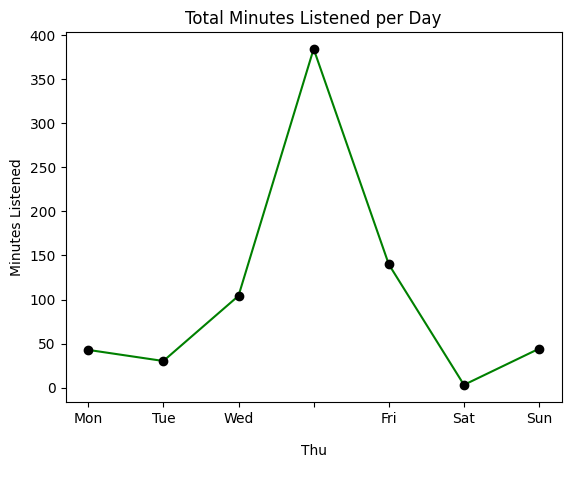

In [119]:
min_day = df.groupby('Wkday')['minPlayed'].sum().reindex(day)
plt.plot(min_day, color='Green', marker="o", mfc='black', mec= "k")
plt.ylabel('Minutes Listened')
plt.title('Total Minutes Listened per Day')
plt.show()

I need to correct information above music was listened to on other days. I need to review the way way data was imported to see why I am getting incorrect visualizations.

Goal: Top 10 Streamed Songs

In [120]:
pd.value_counts(df['trackName'])

I’m So Awesome                                    9
Walk                                              8
Backstage Passes (feat. Jack Harlow)              4
Never Sleep (with Lil Baby feat. Travis Scott)    4
Shoot It Myself (feat. Future)                    4
                                                 ..
Pink Venom                                        1
Die For You                                       1
Bones                                             1
Dead Shot (with Lil Uzi Vert)                     1
Poland                                            1
Name: trackName, Length: 147, dtype: int64

In [121]:
df.value_counts(df['trackName']).head(10)

trackName
I’m So Awesome                                    9
Walk                                              8
Shoot It Myself (feat. Future)                    4
Never Sleep (with Lil Baby feat. Travis Scott)    4
Backstage Passes (feat. Jack Harlow)              4
Jimmy Cooks (feat. 21 Savage)                     3
To The Bone (feat. YoungBoy Never Broke Again)    3
Blow                                              3
Detox                                             3
9 Lives (feat. Polo G & NLE Choppa)               3
dtype: int64

Bar graph Help:https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html

Text(0.5, 0, 'Songs')

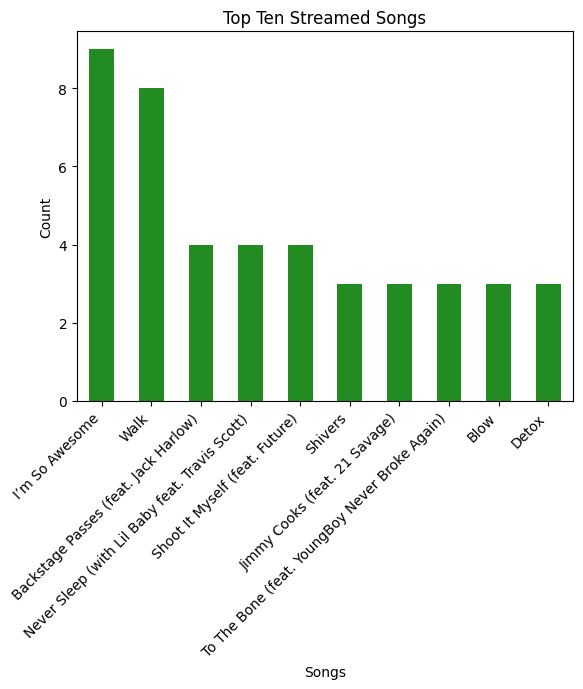

In [122]:
pd.value_counts(df['trackName']).head(10).plot(kind='bar', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Streamed Songs')
plt.ylabel('Count')
plt.xlabel('Songs')

Goal: Top 20 Streamed Artists

In [123]:
pd.value_counts(df['artistName'])

Kodak Black               17
Quavo                     10
EST Gee                    8
Lil Baby                   8
Harry Styles               7
                          ..
J. Cole                    1
Dr. Dre                    1
Bizarrap                   1
A Boogie Wit da Hoodie     1
Lil Yachty                 1
Name: artistName, Length: 105, dtype: int64

In [124]:
pd.value_counts(df['artistName']).head(20)

Kodak Black          17
Quavo                10
EST Gee               8
Lil Baby              8
Harry Styles          7
Camila Cabello        5
NAV                   5
DDG                   5
George Ezra           5
Drake                 5
Sigala                4
Pharrell Williams     4
Elton John            3
Lil Nas X             3
Ed Sheeran            3
Kygo                  3
One Direction         3
Moneybagg Yo          3
Kendrick Lamar        3
Meghan Trainor        3
Name: artistName, dtype: int64

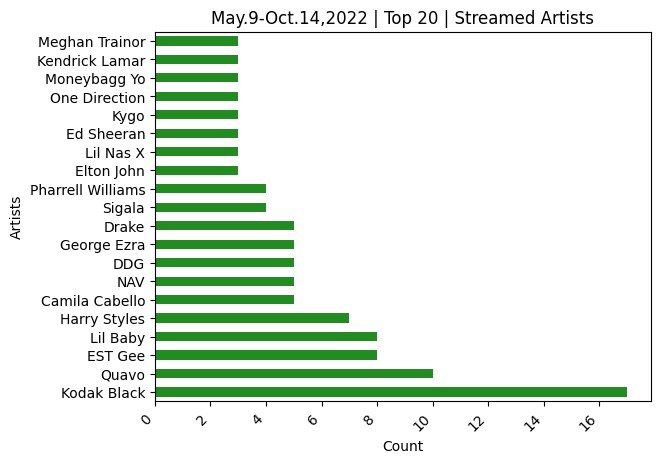

In [125]:
pd.value_counts(df['artistName']).head(20).plot(kind='barh', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('May.9-Oct.14,2022 | Top 20 | Streamed Artists')
plt.ylabel('Artists')
plt.xlabel('Count')
figsize=(100,100)

I dont have play lists 